In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

file_path = "/content/drive/MyDrive/Work Project/Machine Learning Project/laptop_prices.csv"
df = pd.read_csv(file_path)

df.head()


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


# (a) Top 5 Laptop Brands by Number of Products

In [ ]:

top_5_brands = df['Company'].value_counts().head(5)
print("Top 5 Laptop Brands by Number of Products:")
print(top_5_brands)


Top 5 Laptop Brands by Number of Products:
Company
Dell      291
Lenovo    289
HP        268
Asus      152
Acer      101
Name: count, dtype: int64


# (b) Average Laptop Price by Brand


In [ ]:
avg_price_brand = df.groupby('Company')['Price_euros'].mean().sort_values(ascending=False)

print("Average Price by Brand:")
print(avg_price_brand)

print("\nHighest Average Price Brand:", avg_price_brand.idxmax())
print("Lowest Average Price Brand:", avg_price_brand.idxmin())



Average Price by Brand:
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price_euros, dtype: float64

Highest Average Price Brand: Razer
Lowest Average Price Brand: Vero


# (c) Correlation Between Price and Numeric Features


Correlation Matrix:
             Price_euros  CPU_freq       Ram    Inches    Weight
Price_euros     1.000000  0.428847  0.740287  0.070091  0.211883
CPU_freq        0.428847  1.000000  0.366254  0.303115  0.318649
Ram             0.740287  0.366254  1.000000  0.245009  0.389370
Inches          0.070091  0.303115  0.245009  1.000000  0.827339
Weight          0.211883  0.318649  0.389370  0.827339  1.000000


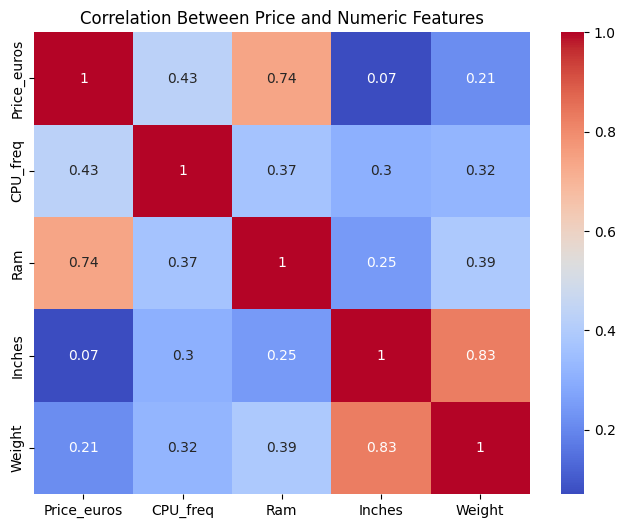

In [ ]:
numeric_features = df[['Price_euros', 'CPU_freq', 'Ram', 'Inches', 'Weight']]
correlation_matrix = numeric_features.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Price and Numeric Features")
plt.show()



# (d) Create StorageTotal Feature


In [ ]:
df['StorageTotal'] = df['PrimaryStorage'] + df['SecondaryStorage']
df[['PrimaryStorage', 'SecondaryStorage', 'StorageTotal']].head()

,PrimaryStorage,SecondaryStorage,StorageTotal
0,128,0,128
1,128,0,128
2,256,0,256
3,512,0,512
4,256,0,256


# (e) REGRESSION: Predict Laptop Price & Decide Best Model

In [ ]:
# Feature Selection
df_reg = df[['Ram', 'Inches', 'CPU_freq', 'PrimaryStorage', 'GPU_company', 'Price_euros']]



In [ ]:
# Encoding + Missing Value Handling
df_reg = pd.get_dummies(df_reg, columns=['GPU_company'], drop_first=True)

X = df_reg.drop('Price_euros', axis=1)
y = df_reg['Price_euros']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)



In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression")
print("RMSE:", lr_rmse)
print("R2 Score:", lr_r2)



Linear Regression
RMSE: 405.62050143812235
R2 Score: 0.6685170818630776


In [ ]:
# Model 2: Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor")
print("RMSE:", rf_rmse)
print("R2 Score:", rf_r2)

Random Forest Regressor
RMSE: 325.6186254444618
R2 Score: 0.7863810207536963


In [ ]:
# Model Comparison Table
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE (low)": [lr_rmse, rf_rmse],
    "R2 Score (high)": [lr_r2, rf_r2]
})

comparison



,Model,RMSE (low),R2 Score (high)
0,Linear Regression,405.620501,0.668517
1,Random Forest,325.618625,0.786381


In [ ]:
# Cross-Validation
lr_cv = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
rf_cv = cross_val_score(RandomForestRegressor(random_state=42), X, y, cv=5, scoring='r2')

print("Linear Regression CV Mean R2:", lr_cv.mean())
print("Random Forest CV Mean R2:", rf_cv.mean())

Linear Regression CV Mean R2: 0.6013813322937105
Random Forest CV Mean R2: 0.705774965854048


In [ ]:
if rf_cv.mean() > lr_cv.mean():
    print("RF is the BEST regression model (higher R2 = better prediction).")
else:
    print("Linear Regression is the BEST regression model (higher R2 = better prediction).")



RF is the BEST regression model (higher R2 = better prediction).


# (f) CLASSIFICATION: Predict Laptop Type

In [ ]:
# Feature Selection
df_cls = df[['Inches', 'Ram', 'PrimaryStorage', 'Weight', 'TypeName']]

X = df_cls.drop('TypeName', axis=1)
y = df_cls['TypeName']

le = LabelEncoder()
y = le.fit_transform(y)



In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Random Forest Classifier (Best)
rf_cls = RandomForestClassifier(random_state=42)
rf_cls.fit(X_train, y_train)

y_pred = rf_cls.predict(X_test)

print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Classification Accuracy: 0.7058823529411765

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.29      0.36        28
           1       0.67      0.79      0.72        43
           2       0.50      0.25      0.33         4
           3       0.84      0.80      0.82       139
           4       0.58      0.79      0.67        33
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         2

    accuracy                           0.71       255
   macro avg       0.44      0.42      0.41       255
weighted avg       0.71      0.71      0.70       255



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


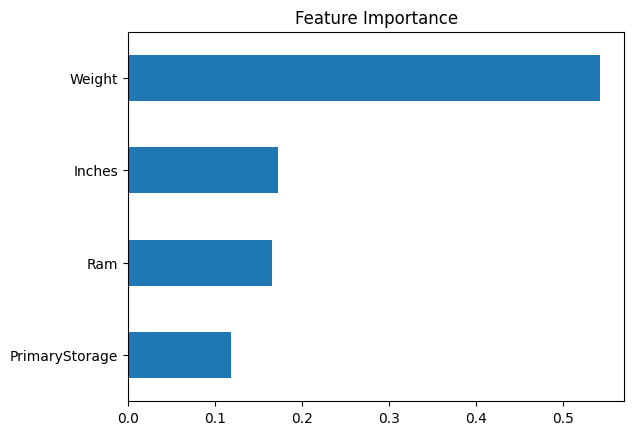

In [ ]:
# Feature Importance
feature_importance = pd.Series(rf_cls.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False)

feature_importance.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()

In [ ]:

from sklearn.impute import SimpleImputer
import pandas as pd


clf_f = RandomForestClassifier(random_state=42)

# Impute X for both models, as LinearRegression requires it
imputer_f = SimpleImputer(strategy='mean')
X_imputed_f = imputer_f.fit_transform(X)

clf_f.fit(X_imputed_f, y)

# Feature importance for RandomForestClassifier
importances = clf_f.feature_importances_
feature_names = X.columns

print("Feature Importance (descending) for RandomForestClassifier:")
for f, imp in sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True):
    print(f"{f}: {imp:.4f}")


lr_model = LinearRegression()
lr_model.fit(X_imputed_f, y)

# Feature importance for Linear Regression
feature_names = X.columns
coefficients = lr_model.coef_

print("\nFeature Importance (coefficients, descending by absolute value) for LinearRegression:")
for f, coef in sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True):
    print(f"{f}: {coef:.4f}")



Feature Importance (descending) for RandomForestClassifier:
Weight: 0.5426
Inches: 0.1728
Ram: 0.1669
PrimaryStorage: 0.1177

Feature Importance (coefficients, descending by absolute value) for LinearRegression:
Weight: -1.0236
Inches: 0.3275
Ram: -0.0305
PrimaryStorage: 0.0002
